<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Effective_Pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the necessary libraries we will be working with.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset from an author we are reading's Github

In [ ]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)

Info related to our dataframe that we created from a csv into pandas.
The dtypes are critical to note as they contain import data about the data in each column (accurate or accurate). INfo also gives us a quick snapshot of rows per column and if there are null values.

In [ ]:
alta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    14160 non-null  object 
 1   NAME       14160 non-null  object 
 2   LATITUDE   14160 non-null  float64
 3   LONGITUDE  14160 non-null  float64
 4   ELEVATION  14160 non-null  float64
 5   DATE       14160 non-null  object 
 6   DAPR       25 non-null     float64
 7   DASF       5 non-null      float64
 8   MDPR       68 non-null     float64
 9   MDSF       27 non-null     float64
 10  PRCP       13830 non-null  float64
 11  SNOW       13795 non-null  float64
 12  SNWD       12912 non-null  float64
 13  TMAX       13914 non-null  float64
 14  TMIN       13857 non-null  float64
 15  TOBS       13641 non-null  float64
 16  WT01       85 non-null     float64
 17  WT03       226 non-null    float64
 18  WT04       20 non-null     float64
 19  WT05       49 non-null     float64
 20  WT06  

We are transposing describe here, depending on your dataset transposing might make it more readable or actionable for you.

In [ ]:
alta_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATION,14160,1,USC00420072,14160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME,14160,1,"ALTA, UT US",14160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUDE,14160.0,NaN,NaN,NaN,40.5905,0.0,40.5905,40.5905,40.5905,40.5905,40.5905
LONGITUDE,14160.0,NaN,NaN,NaN,-111.6369,0.0,-111.6369,-111.6369,-111.6369,-111.6369,-111.6369
ELEVATION,14160.0,NaN,NaN,NaN,2660.9,0.0,2660.9,2660.9,2660.9,2660.9,2660.9
DATE,14160,14160,1980-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAPR,25.0,NaN,NaN,NaN,3.32,5.800287,2.0,2.0,2.0,2.0,31.0
DASF,5.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0
MDPR,68.0,NaN,NaN,NaN,0.565147,0.596939,0.01,0.1075,0.35,0.785,2.65
MDSF,27.0,NaN,NaN,NaN,7.175185,8.053246,0.12,2.01,5.0,7.99,37.01


We are not taking the date column and using pandas to set it as a pandas datetime type. This is absolutely critical as it allows to run time based operations and charting that we would not be able to if it remained an object type (string). Datetime allows for more relevant and powerful time based operations than float or integer allow for (without creating specific functions to replicate ones created with datetime objects in mind.

In [ ]:
dates = pd.to_datetime(alta_df.DATE)

the dtype returned is object but that is because we are using describe. When using describe on a date series instead of min and max we have first and last. So we can quickly identify our date range in our seris and if there are any missing values or repeat values (dates in a series should always be unique...)

In [ ]:
dates.describe().T

<ipython-input-81-a19752a9a647>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dates.describe().T


count                         14160
unique                        14160
top       1980-01-01 00:00:00+00:00
freq                              1
first     1980-01-01 00:00:00+00:00
last      2019-09-07 00:00:00+00:00
Name: DATE, dtype: object

In [ ]:
dates.dtype

datetime64[ns, UTC]

We can run all manner of operaitons using dt or datetime, tz, dz and other time based functions and methods. In this example we are taking the values that are the last day the month (a property related to dates in our dt series..) we then calculate the mean which because this is a filtered at a boolean level (true / false) means that the output mean (1 for true, 0 for false) is the % of that series with that condition.

As expected, last day of the month is about 3.2% of the days in our entire sample. A quick check like this can identify any issues in a large dataset.

In [ ]:
# dates.dt.is_month_end
dates.dt.is_month_end.mean()

0.03283898305084746

Using strftime (string format time) - we can take a time series and change the formating and output of the time values. We could be displaying the day of the week by name or the week number or no weeks related data at all just annual. The functionality around time series is incredibly roboust and can accomodate almost all situatons.

using %U provides us with the week number of the year.
%W provides us with the week number relative to the start of the sample.

In [ ]:
dates.dt.strftime('%U')

0        00
1        00
2        00
3        00
4        00
         ..
14155    35
14156    35
14157    35
14158    35
14159    35
Name: DATE, Length: 14160, dtype: object

Instead of outputting a full time stamp we can output just the parts of our time series that we need.

In [ ]:
dates.dt.strftime('%d/%m/%y')

0        01/01/80
1        02/01/80
2        03/01/80
3        04/01/80
4        05/01/80
           ...   
14155    03/09/19
14156    04/09/19
14157    05/09/19
14158    06/09/19
14159    07/09/19
Name: DATE, Length: 14160, dtype: object

Because of the changes made needed to use localize to convert (if we want our data to have a timezone). UTC is the default timezone but this can easily be changed to other timezoned if needed.

In [ ]:
# dates.dt.tz_convert('UTC')
dates = dates.dt.tz_localize('UTC')

Now our dtype has UTC in it

In [ ]:
dates.dtype

datetime64[ns, UTC]

Once localized, converting works

In [ ]:
dates.dt.tz_convert('UTC')

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

In [ ]:
dates.dtype

datetime64[ns, UTC]

Notice the offset column now has values since the offset is relative to UTC

In [ ]:
dates.dt.tz_convert('EST')

0       1979-12-31 19:00:00-05:00
1       1980-01-01 19:00:00-05:00
2       1980-01-02 19:00:00-05:00
3       1980-01-03 19:00:00-05:00
4       1980-01-04 19:00:00-05:00
                   ...           
14155   2019-09-02 19:00:00-05:00
14156   2019-09-03 19:00:00-05:00
14157   2019-09-04 19:00:00-05:00
14158   2019-09-05 19:00:00-05:00
14159   2019-09-06 19:00:00-05:00
Name: DATE, Length: 14160, dtype: datetime64[ns, EST]

This formula allows us to output (and subsequnetly store or run operations on..) the second related data from our time series.

In [ ]:
 secs = dates.view(int).floordiv(1e9).astype(int)
 secs

0         315532800
1         315619200
2         315705600
3         315792000
4         315878400
            ...    
14155    1567468800
14156    1567555200
14157    1567641600
14158    1567728000
14159    1567814400
Name: DATE, Length: 14160, dtype: int64

In [ ]:
dates

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

by following these steps we can load additional time related data into our series in this case we are adding second data then localizing the data to the UTC TZ

In [ ]:
pd.to_datetime(secs, unit='s').dt.tz_localize('UTC')

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

In [ ]:
dates.view

<bound method Series.view of 0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]>

Snowfall column in Snow dataset.

In [ ]:
alta_df.SNOW

0        2.0
1        3.0
2        1.0
3        0.0
4        0.0
        ... 
14155    0.0
14156    0.0
14157    0.0
14158    0.0
14159    0.0
Name: SNOW, Length: 14160, dtype: float64

We are using the rename method to change the index values of our series to it's corresponding date values. When two indexes match each other, renaming one with the other, overwrites the index. By making our index our corresponding time series, this gives us the ability to run significant operations on our dataset.

In [ ]:
alta_df.SNOW.rename(dates)

1980-01-01 00:00:00+00:00    2.0
1980-01-02 00:00:00+00:00    3.0
1980-01-03 00:00:00+00:00    1.0
1980-01-04 00:00:00+00:00    0.0
1980-01-05 00:00:00+00:00    0.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

And just like that we can chart snowfall relative to the time series for our entire series.

<Axes: >

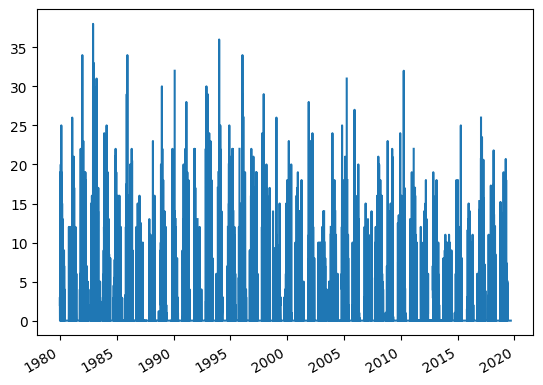

In [ ]:
alta_df.SNOW.rename(dates).plot()

I created a seperate column and added it to the DF that has the date related info. I did this to check index values against another column. I also wanted to update the column data using inplace and potentially set this time series to different values relative to the index. (I want to leave the original time series untouched).

In [ ]:
alta_df = alta_df.assign(fdates = dates, inplace=True)


We can see fdates was added, we copied one column to create a new one.

In [ ]:
alta_df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11', 'fdates', 'inplace'],
      dtype='object')

We can now see by year the average value for each field. Certain values are constants like the lat / long / elevation

In [ ]:
alta_df.groupby([alta_df.fdates.dt.year]).mean()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11,inplace
fdates,,,,,,,,,,,,,,,,,,,,
1980,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.196639,1.553279,39.085635,48.685792,29.516393,33.821918,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1981,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.214247,1.886301,23.901370,49.490411,29.953425,34.158904,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1982,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.259562,2.327397,54.498630,43.882192,28.000000,30.758904,1.0,1.0,NaN,1.0,NaN,1.0,1.0
1983,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.297370,2.478082,58.846575,44.282192,29.882192,32.871233,1.0,1.0,1.0,1.0,NaN,1.0,1.0
1984,40.5905,-111.6369,2660.9,5.0,NaN,2.650000,NaN,0.224211,1.857377,64.828671,44.142077,27.953552,31.942623,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1985,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.164603,1.354420,5.512605,46.308540,29.250689,33.602210,1.0,1.0,NaN,1.0,NaN,NaN,1.0
1986,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.215754,1.668451,18.594378,45.298137,27.683230,34.075000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1987,40.5905,-111.6369,2660.9,NaN,NaN,NaN,NaN,0.087735,0.734637,20.965944,49.282967,29.596154,44.107143,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1988,40.5905,-111.6369,2660.9,2.0,2.0,0.590000,37.010000,0.069326,1.140625,23.662791,49.498623,29.727273,43.641873,1.0,1.0,NaN,NaN,NaN,NaN,1.0


Here is the same exaxt data by transposed.

In [ ]:
alta_df.groupby([alta_df['fdates'].dt.year]).mean().T

<ipython-input-84-64b1c13b7677>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  alta_df.groupby([alta_df['fdates'].dt.year]).mean().T


fdates,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
LATITUDE,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,...,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500,40.590500
LONGITUDE,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,...,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900,-111.636900
ELEVATION,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,...,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000,2660.900000
DAPR,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,2.000000,NaN,...,NaN,31.000000,NaN,NaN,2.000000,NaN,2.000000,2.000000,2.000000,NaN
DASF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDPR,NaN,NaN,NaN,NaN,2.650000,NaN,NaN,NaN,0.590000,NaN,...,0.578000,0.010000,NaN,NaN,1.850000,NaN,0.470000,0.270000,0.380000,NaN
MDSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.010000,NaN,...,6.665833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,0.196639,0.214247,0.259562,0.297370,0.224211,0.164603,0.215754,0.087735,0.069326,0.093223,...,0.183406,0.200898,0.146570,0.141676,0.171977,0.139178,0.142500,0.153547,0.122936,0.186559
SNOW,1.553279,1.886301,2.327397,2.478082,1.857377,1.354420,1.668451,0.734637,1.140625,0.930556,...,1.265396,1.429773,1.352837,1.147955,1.089636,0.774566,1.019726,1.242061,1.039286,1.504016
SNWD,39.085635,23.901370,54.498630,58.846575,64.828671,5.512605,18.594378,20.965944,23.662791,32.570033,...,35.510264,66.335484,28.840426,34.375000,30.586402,18.737892,27.027933,36.766667,21.917808,57.717742


In [ ]:
%%timeit
alta_df.groupby([alta_df.fdates.dt.year]).mean()

In [ ]:
alta_df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11', 'fdates', 'inplace'],
      dtype='object')

<ipython-input-115-a4d8ac3e5c4b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


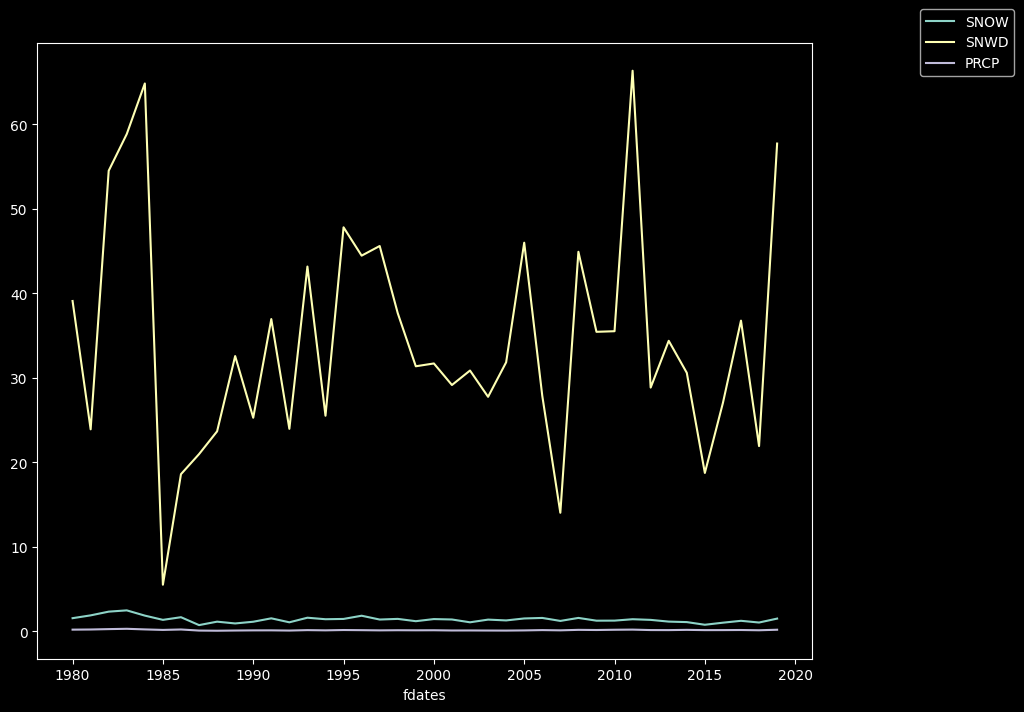

In [ ]:
cols = ['fdates','SNOW', 'SNWD','PRCP']
(alta_df[cols]
 .groupby([alta_df.fdates.dt.year])
 .mean()
 .plot(figsize=(10,8))
 .legend(bbox_to_anchor=(1.2,1), loc='center')
)

<ipython-input-116-4b5979f9d8d7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


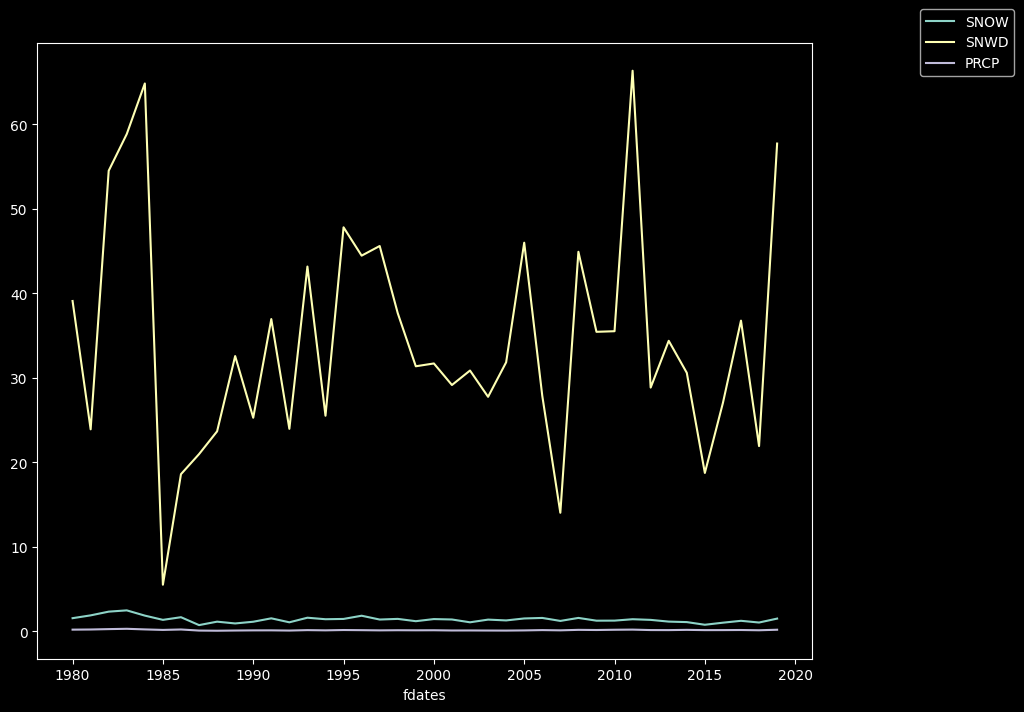

In [ ]:
snow_wind_prc = (alta_df[cols]
 .groupby([alta_df.fdates.dt.year])
 .mean()
 .plot(figsize=(10,8))
 .legend(bbox_to_anchor=(1.2,1), loc='center')
)

Some very strong correlations here between snow, wind and precipation

In [ ]:
snow_wind_prc.corr()

,SNOW,SNWD,PRCP
SNOW,1.000000,0.569504,0.721238
SNWD,0.569504,1.000000,0.500224
PRCP,0.721238,0.500224,1.000000


In [ ]:
(import matplotlib.style as style
style.use('dark_background')

average snow fall per year

<ipython-input-126-071add90c53e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


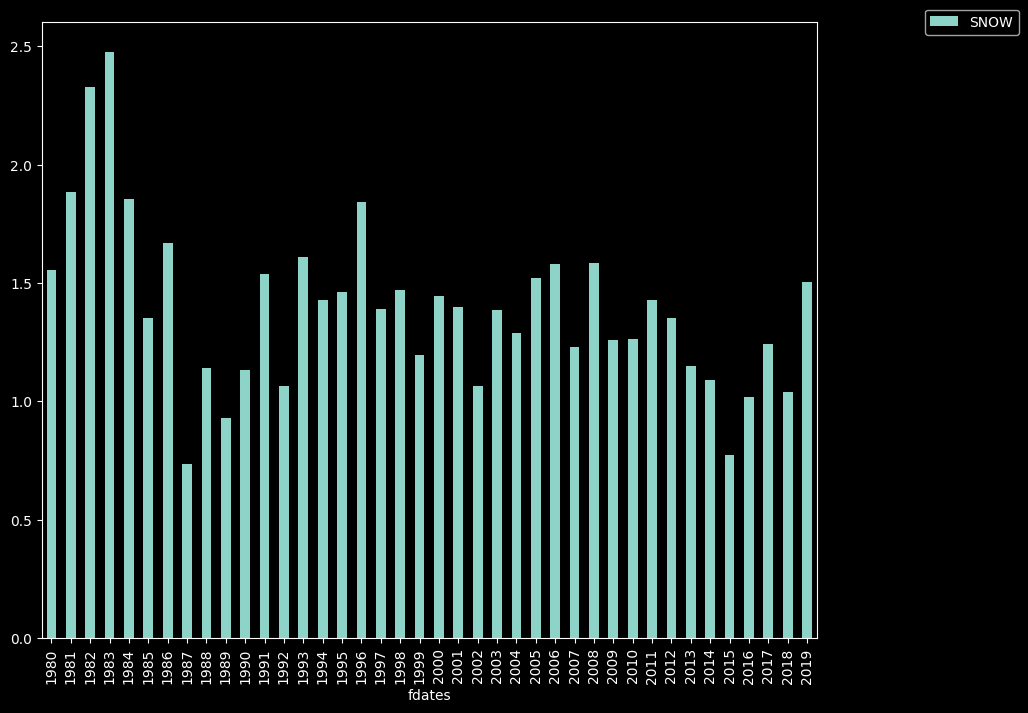

In [ ]:
(alta_df[['fdates', 'SNOW']]
 .groupby([alta_df.fdates.dt.year])
 .mean()
 .plot(figsize=(10,8), kind='bar')
 .legend(bbox_to_anchor=(1.2,1), loc='center'))




The horizontal line we plotted here shows the average snow fall across the entire sample. We can easily see most of the last decade falls below average in terms of snow fall for the last 40 years.

<ipython-input-32-ab05531257ee>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


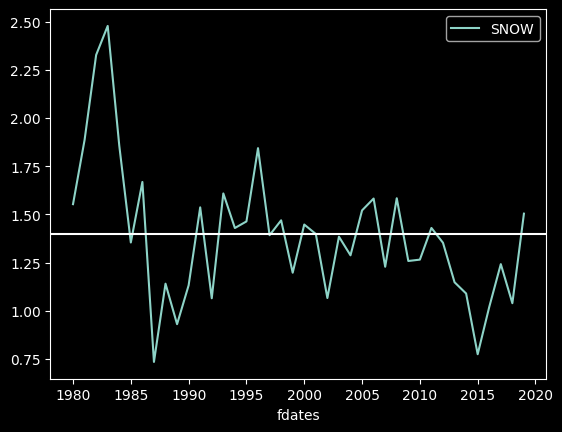

In [ ]:
(alta_df[['fdates', 'SNOW']]
 .groupby([alta_df.fdates.dt.year,])
 .mean()
 .plot()
 )
average_per_sample = alta_df.SNOW.mean()
plt.axhline(average_per_sample)
plt.legend()
plt.show()

standard deviation across the same.

In [ ]:
alta_df.SNOW.std()

3.591151852046391

standard deviation relative to the sample (charts follow the same exact formation as the mean (standard deviation is derived from mean). We can see though on the Y axis a difference as standard deviations emphasize differences relative to the average more greatly.

<ipython-input-34-f20f04dfebf6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .std()


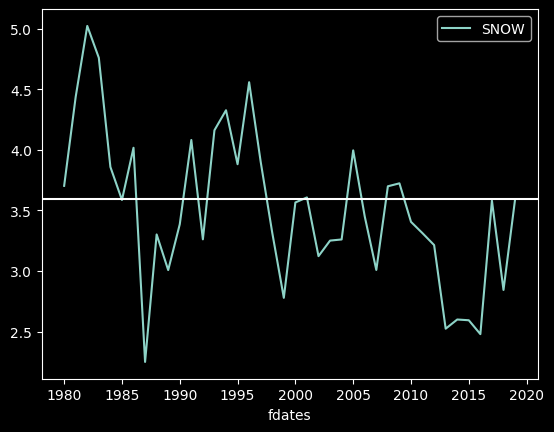

In [ ]:
(alta_df[['fdates', 'SNOW']]
 .groupby([alta_df.fdates.dt.year,])
 .std()
 .plot())


plt.axhline(alta_df.SNOW.std())
plt.show()


We are not tracking the snowfall by year and month

<ipython-input-35-995bcf0b77d6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


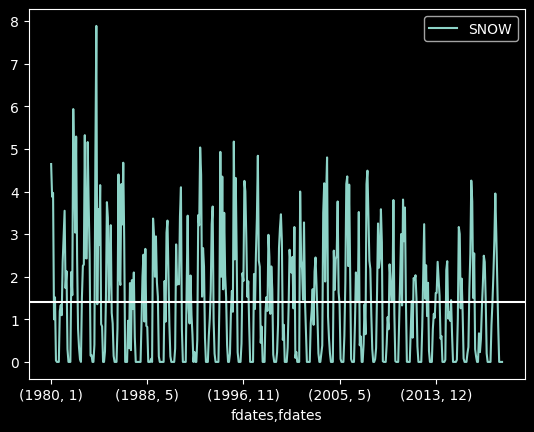

In [ ]:
(alta_df[['fdates', 'SNOW']]
 .groupby([alta_df.fdates.dt.year, alta_df.fdates.dt.month])
 .mean()
 .plot())


plt.axhline(alta_df.SNOW.mean())
plt.show()


This is the snow fall pattern by month alone (averaging each month, ignoring year). As expected th early and late months account for virtually all of the snow.

<ipython-input-36-05a00b6f58b1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


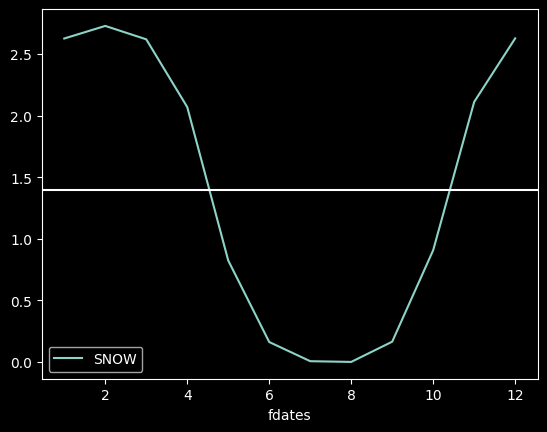

In [ ]:
(alta_df[['fdates', 'SNOW']]
 .groupby([alta_df.fdates.dt.month])
 .mean()
 .plot())


plt.axhline(alta_df.SNOW.mean())
plt.show()


Year is a properly and using dt.year we can output just the years of our timeseries.

In [ ]:
alta_df.fdates.dt.year

0        1980
1        1980
2        1980
3        1980
4        1980
         ... 
14155    2019
14156    2019
14157    2019
14158    2019
14159    2019
Name: fdates, Length: 14160, dtype: int64

So essentially here we take a series (one of the columns from our df) and associate our date index (which is the same index as the DF now) with it using the rename method and we store this is in a new variable. THis allows us to safely manipulate our data and quickly reference it in the manner we need. We've now quickly created a series with its own dt index.

In [ ]:
snow = alta_df.SNOW.rename(dates)
snow

1980-01-01 00:00:00+00:00    2.0
1980-01-02 00:00:00+00:00    3.0
1980-01-03 00:00:00+00:00    1.0
1980-01-04 00:00:00+00:00    0.0
1980-01-05 00:00:00+00:00    0.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

If we call the index from our variable it exactly matches our df.

In [ ]:
snow.index

DatetimeIndex(['1980-01-01 00:00:00+00:00', '1980-01-02 00:00:00+00:00',
               '1980-01-03 00:00:00+00:00', '1980-01-04 00:00:00+00:00',
               '1980-01-05 00:00:00+00:00', '1980-01-06 00:00:00+00:00',
               '1980-01-07 00:00:00+00:00', '1980-01-08 00:00:00+00:00',
               '1980-01-09 00:00:00+00:00', '1980-01-10 00:00:00+00:00',
               ...
               '2019-08-29 00:00:00+00:00', '2019-08-30 00:00:00+00:00',
               '2019-08-31 00:00:00+00:00', '2019-09-01 00:00:00+00:00',
               '2019-09-02 00:00:00+00:00', '2019-09-03 00:00:00+00:00',
               '2019-09-04 00:00:00+00:00', '2019-09-05 00:00:00+00:00',
               '2019-09-06 00:00:00+00:00', '2019-09-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=14160, freq=None)

In [ ]:
snow.mean()

1.3964914824211672

any() return a true or false if condition is met, in this case NA fields

In [ ]:
snow.isna().any()

True

Now we can easily see all the dates that are missing snow data in our sample. This is an incredibly valuable technique for quickly inspecting. Often times missing data value can cluster around certain times and there might be a reason for that. Always, when possible, first check with the source of data and anyone with practical knowledge related to the dataset (work environment).

In [ ]:
snow[snow.isna()]

1985-07-30 00:00:00+00:00   NaN
1985-09-12 00:00:00+00:00   NaN
1985-09-19 00:00:00+00:00   NaN
1986-02-07 00:00:00+00:00   NaN
1986-06-26 00:00:00+00:00   NaN
                             ..
2017-04-26 00:00:00+00:00   NaN
2017-09-20 00:00:00+00:00   NaN
2017-10-02 00:00:00+00:00   NaN
2017-12-23 00:00:00+00:00   NaN
2018-12-03 00:00:00+00:00   NaN
Name: SNOW, Length: 365, dtype: float64

Wide variety of years that have missing values not isolated to any particular years

By saving as an integer, We now have numeric values for false / true (0 , 1). This is helpful for a variety of reasons.

In [ ]:
snow_missing = snow.isna().astype(int)

Missing values per year - we've now created a chart that shows us the amount of missing values per year....

<Axes: >

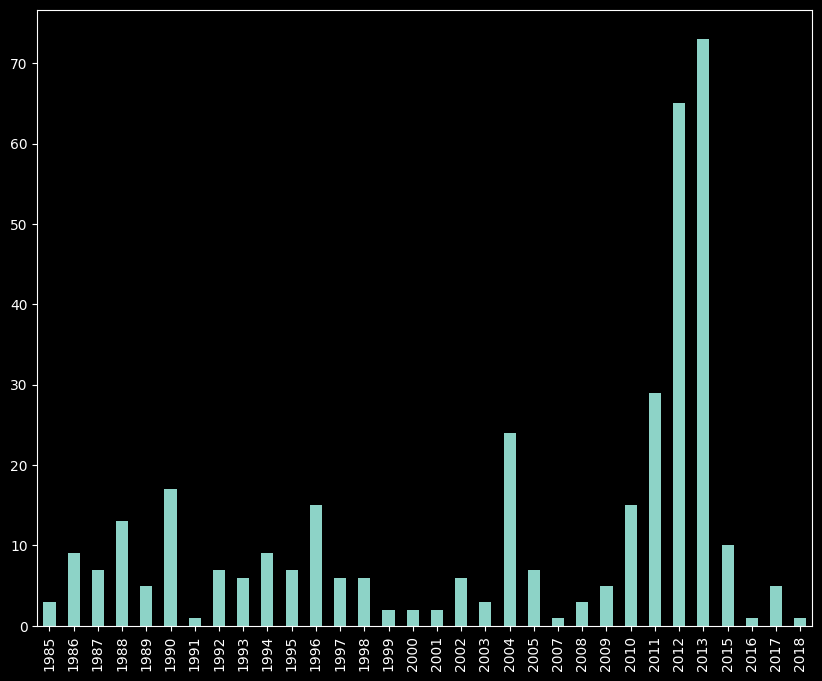

In [ ]:
(snow
 .loc[snow_missing == 1]
 .index.year
 .value_counts()
 .sort_index()
 .plot(kind='bar', figsize=(10,8))
)

<Axes: >

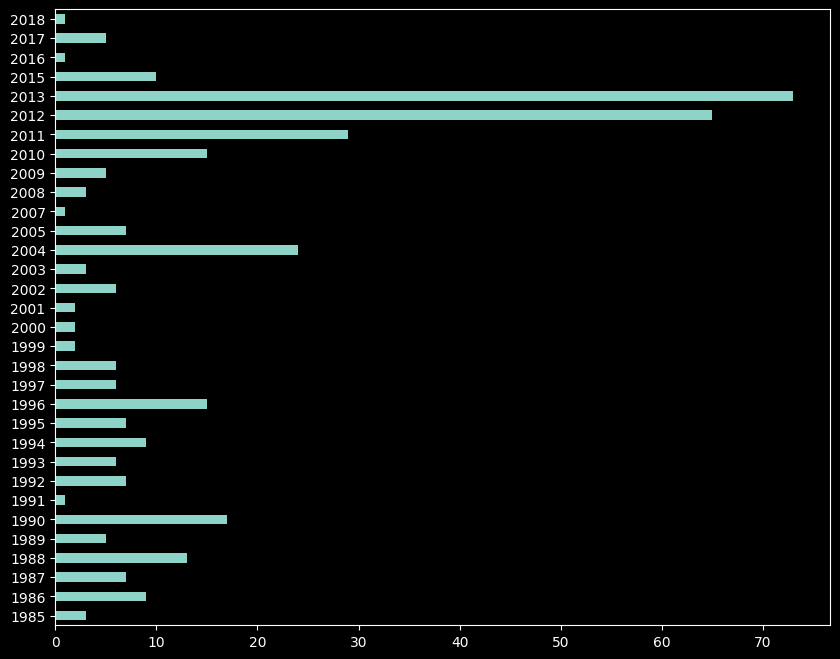

In [127]:
(snow
 .loc[snow_missing == 1]
 .index.year
 .value_counts()
 .sort_index()
 .plot(kind='barh', figsize=(10,8))
)

We can see missinhg values start in 1985 and 2013 has the most missing values (70 - that amounts to almost 20% of that year).

In [ ]:
snow.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', length=14160)

Mean snow fall by week. Unsurprisingly, the last few weks of the year average the most snowfall.

<ipython-input-47-5f463c829d2e>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  snow.groupby(snow.index.week).mean().plot()


<Axes: >

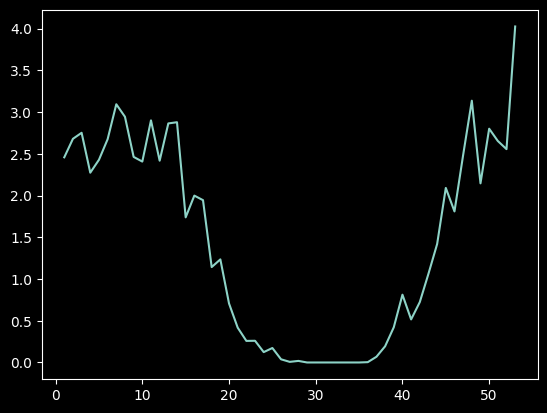

In [ ]:
snow.groupby(snow.index.week).mean().plot()

By  day of the month (was not expecting any real relevancy here more just learning more about pandas and python time series features...)

<Axes: >

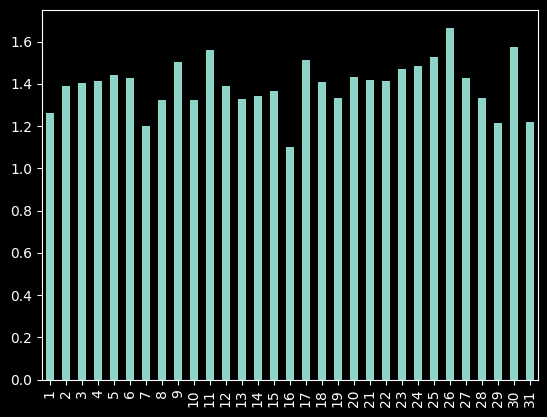

In [132]:
snow.groupby(snow.index.day).mean().plot(kind='bar')

Same for this slide... its import to note if this was a data set related to sales day of the month and day of the week can be of paramount importance and significance to your business and or other operations.

0 represents Monday (we can also output the actual days of week).

<Axes: >

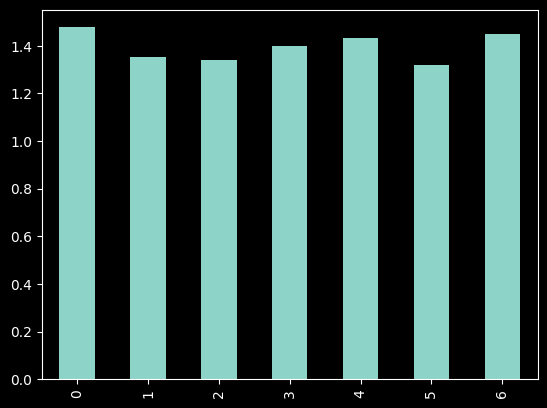

In [129]:
snow.groupby(snow.index.dayofweek).mean().plot(kind='bar')

Same for quarterly data (the economy).

<Axes: >

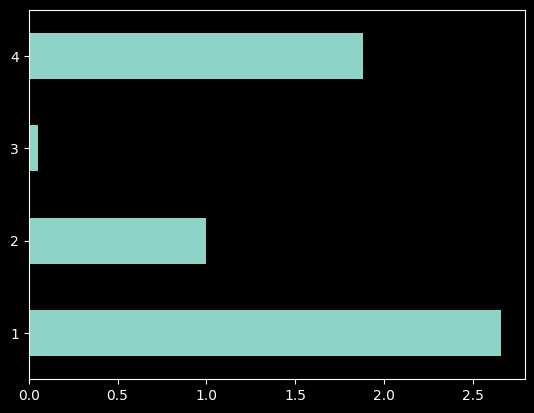

In [128]:
snow.groupby(snow.index.quarter).mean().plot(kind='barh')

% of NA fields in our snow series.

In [ ]:
snow[snow.isna()].shape[0] / snow.shape[0] * 100

2.577683615819209

In [152]:
snow.describe()

count    13795.000000
mean         1.396491
std          3.591152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         38.000000
Name: SNOW, dtype: float64

In [154]:
snow.index[0]

Timestamp('1980-01-01 00:00:00+0000', tz='UTC')

In [155]:
snow.index

DatetimeIndex(['1980-01-01 00:00:00+00:00', '1980-01-02 00:00:00+00:00',
               '1980-01-03 00:00:00+00:00', '1980-01-04 00:00:00+00:00',
               '1980-01-05 00:00:00+00:00', '1980-01-06 00:00:00+00:00',
               '1980-01-07 00:00:00+00:00', '1980-01-08 00:00:00+00:00',
               '1980-01-09 00:00:00+00:00', '1980-01-10 00:00:00+00:00',
               ...
               '2019-08-29 00:00:00+00:00', '2019-08-30 00:00:00+00:00',
               '2019-08-31 00:00:00+00:00', '2019-09-01 00:00:00+00:00',
               '2019-09-02 00:00:00+00:00', '2019-09-03 00:00:00+00:00',
               '2019-09-04 00:00:00+00:00', '2019-09-05 00:00:00+00:00',
               '2019-09-06 00:00:00+00:00', '2019-09-07 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=14160, freq=None)

In [ ]:
snow[snow.isna()]

1985-07-30 00:00:00+00:00   NaN
1985-09-12 00:00:00+00:00   NaN
1985-09-19 00:00:00+00:00   NaN
1986-02-07 00:00:00+00:00   NaN
1986-06-26 00:00:00+00:00   NaN
                             ..
2017-04-26 00:00:00+00:00   NaN
2017-09-20 00:00:00+00:00   NaN
2017-10-02 00:00:00+00:00   NaN
2017-12-23 00:00:00+00:00   NaN
2018-12-03 00:00:00+00:00   NaN
Name: SNOW, Length: 365, dtype: float64

We are using loc to pull ranges in which there are NAN values to take a closer look.

In [ ]:
snow.loc['1985-09': '1985-09-20']

1985-09-01 00:00:00+00:00    0.0
1985-09-02 00:00:00+00:00    0.0
1985-09-03 00:00:00+00:00    0.0
1985-09-04 00:00:00+00:00    0.0
1985-09-05 00:00:00+00:00    0.0
1985-09-06 00:00:00+00:00    0.0
1985-09-07 00:00:00+00:00    0.0
1985-09-08 00:00:00+00:00    0.0
1985-09-09 00:00:00+00:00    0.0
1985-09-10 00:00:00+00:00    0.0
1985-09-11 00:00:00+00:00    0.0
1985-09-12 00:00:00+00:00    NaN
1985-09-13 00:00:00+00:00    0.0
1985-09-14 00:00:00+00:00    0.0
1985-09-15 00:00:00+00:00    0.0
1985-09-16 00:00:00+00:00    0.0
1985-09-17 00:00:00+00:00    0.0
1985-09-18 00:00:00+00:00    0.0
1985-09-19 00:00:00+00:00    NaN
1985-09-20 00:00:00+00:00    0.0
Name: SNOW, dtype: float64

Given this weather related data, we should have different strategies for how to deal with NAN values dependent on the time of the year.

In [ ]:
snow.loc['1987-12-30':'1988-01-10']

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    NaN
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    NaN
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

Of course one option is to fill NAN values with 0. This a valid approach with merit often times.

In [ ]:
snow.loc['1985-09':'1985-09-20'].fillna(0)

1985-09-01 00:00:00+00:00    0.0
1985-09-02 00:00:00+00:00    0.0
1985-09-03 00:00:00+00:00    0.0
1985-09-04 00:00:00+00:00    0.0
1985-09-05 00:00:00+00:00    0.0
1985-09-06 00:00:00+00:00    0.0
1985-09-07 00:00:00+00:00    0.0
1985-09-08 00:00:00+00:00    0.0
1985-09-09 00:00:00+00:00    0.0
1985-09-10 00:00:00+00:00    0.0
1985-09-11 00:00:00+00:00    0.0
1985-09-12 00:00:00+00:00    0.0
1985-09-13 00:00:00+00:00    0.0
1985-09-14 00:00:00+00:00    0.0
1985-09-15 00:00:00+00:00    0.0
1985-09-16 00:00:00+00:00    0.0
1985-09-17 00:00:00+00:00    0.0
1985-09-18 00:00:00+00:00    0.0
1985-09-19 00:00:00+00:00    0.0
1985-09-20 00:00:00+00:00    0.0
Name: SNOW, dtype: float64

We certainly would not want to do that during winter months.

In [ ]:
snow.loc['1987-12-30':'1988-01-10']

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    NaN
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    NaN
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

This is during the snowing season we would not want to just fill with a 0 value here. interpolate, frontfill or backfill are great options.

In [ ]:
snow.loc['1987-12-30':'1988-01-10'].interpolate()

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    2.5
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    1.0
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

front fill provides us with a much higher snowing day (based on the previous two days being high) but opts for a 0 value where interpolate provided a 1 inch of snow estimate. Overall though ffill adds 5 inches snow total while interpolate adds 3.5 (in our sample range).

If it was critical to have accurate values here we could also fill from other sources on those days.

In [ ]:
snow.loc['1987-12-30':'1988-01-10'].ffill()

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    5.0
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    0.0
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

In [ ]:
snow.loc['1987-12-30':'1988-01-10']

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    NaN
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    NaN
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

Backfill produces extra 2 inches. Another option is we could take take the rolling 30 day mean and use that to fill NAN values.

In [ ]:
snow.loc['1987-12-30':'1988-01-10'].bfill()

1987-12-30 00:00:00+00:00    6.0
1987-12-31 00:00:00+00:00    5.0
1988-01-01 00:00:00+00:00    0.0
1988-01-02 00:00:00+00:00    0.0
1988-01-03 00:00:00+00:00    0.0
1988-01-04 00:00:00+00:00    2.0
1988-01-05 00:00:00+00:00    2.0
1988-01-06 00:00:00+00:00    6.0
1988-01-07 00:00:00+00:00    4.0
1988-01-08 00:00:00+00:00    9.0
1988-01-09 00:00:00+00:00    5.0
1988-01-10 00:00:00+00:00    2.0
Name: SNOW, dtype: float64

Using our time series methods and functions is incredibly helpful if we need to identify or isolate certain parts of the year (time in general) for our sample.

In [ ]:
winter = (snow.index.quarter == 1) | (snow.index.quarter== 4)

Where replaces where the condition is false so here we are finding where winter and snow is na (TRUE) but we are flipping the condition so it becomes false because we want to replace those values (next cell)

In [ ]:
snow.where(~(winter & snow.isna()))

1980-01-01 00:00:00+00:00    2.0
1980-01-02 00:00:00+00:00    3.0
1980-01-03 00:00:00+00:00    1.0
1980-01-04 00:00:00+00:00    0.0
1980-01-05 00:00:00+00:00    0.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

We want to use interpolate if it is winter and a 0 value if it is not for missing snow data. Again we are using where so we identify when it is NOT winter since winter has a tilda infront of it and snow is missing. This is set to false though because we want to replace those values with 0 since it is summer.



In [ ]:
(snow
.where(~(winter & snow.isna()), snow.interpolate())
.where(~(~winter & snow.isna()), 0)
.loc[['1985-09-19','1988-01-01']]
 )

1985-09-19 00:00:00+00:00    0.0
1988-01-01 00:00:00+00:00    2.5
Name: SNOW, dtype: float64

In [ ]:
snow

1980-01-01 00:00:00+00:00    2.0
1980-01-02 00:00:00+00:00    3.0
1980-01-03 00:00:00+00:00    1.0
1980-01-04 00:00:00+00:00    0.0
1980-01-05 00:00:00+00:00    0.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

Shift method shifts dates up (or down). This functionality is the basis for rolling calculations (we can use a wide variety of calculations and even create our own unique functions

In [ ]:
snow.shift(1)

1980-01-01 00:00:00+00:00    NaN
1980-01-02 00:00:00+00:00    2.0
1980-01-03 00:00:00+00:00    3.0
1980-01-04 00:00:00+00:00    1.0
1980-01-05 00:00:00+00:00    0.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

In [ ]:
snow.shift(-1)

1980-01-01 00:00:00+00:00    3.0
1980-01-02 00:00:00+00:00    1.0
1980-01-03 00:00:00+00:00    0.0
1980-01-04 00:00:00+00:00    0.0
1980-01-05 00:00:00+00:00    1.0
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    NaN
Name: SNOW, Length: 14160, dtype: float64

In [ ]:
snow.sum()

19264.600000000002

In [ ]:
(snow + snow.shift(1)).sum()

37489.6

By adding all the shifted levels together and dividing by the amount of shifted levels (5 total when you include snows initial state as one of the levels)  you get the same vaue that the rolling mean function computes.

In [ ]:
(snow
.add(snow.shift(1))
.add(snow.shift(2))
.add(snow.shift(3))
.add(snow.shift(4))
.div(5)
# .sum()
)

1980-01-01 00:00:00+00:00    NaN
1980-01-02 00:00:00+00:00    NaN
1980-01-03 00:00:00+00:00    NaN
1980-01-04 00:00:00+00:00    NaN
1980-01-05 00:00:00+00:00    1.2
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

In [ ]:
(snow
 .rolling(5)
 .mean()
.sum()
)

17586.16

the first 4 values are NAN because we are doing a 5 day rolling mean and you need a minimum of 5 before means can start being computed.

In [ ]:
(snow
 .rolling(5)
 .mean()
)

1980-01-01 00:00:00+00:00    NaN
1980-01-02 00:00:00+00:00    NaN
1980-01-03 00:00:00+00:00    NaN
1980-01-04 00:00:00+00:00    NaN
1980-01-05 00:00:00+00:00    1.2
                            ... 
2019-09-03 00:00:00+00:00    0.0
2019-09-04 00:00:00+00:00    0.0
2019-09-05 00:00:00+00:00    0.0
2019-09-06 00:00:00+00:00    0.0
2019-09-07 00:00:00+00:00    0.0
Name: SNOW, Length: 14160, dtype: float64

because of our index being out date - we can easily calculate aggregate functions by using resample. We can set the time interval we want to sample at and the aggregate function.

In [ ]:
snow.resample?

Resample allows us to take our series (with corresponding DT index, otherwise you need to specify in the parameter which index to use for DT), and we can pick different time intervals we want our data split into (resampled) and then the aggregate function to run once that is done. In this example we are taking the max snow fall on a single day each year and charting that.

<Axes: >

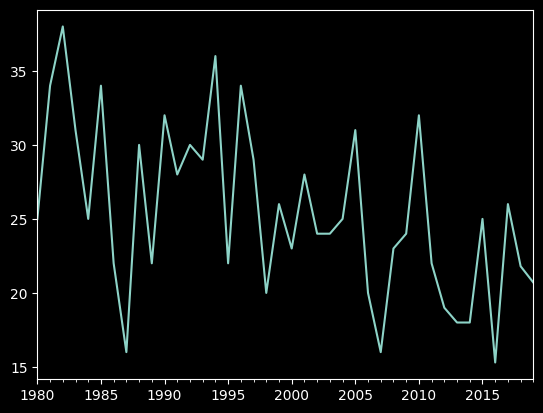

In [ ]:
(snow
 .resample('Y')
 .max()
 .plot()
 )

In this example we are tracking the max snowfall per month (it does not aggregate the month values as you can see in the output).

In [ ]:
(snow
 .resample('M')
 .max()
)

1980-01-31 00:00:00+00:00    20.0
1980-02-29 00:00:00+00:00    25.0
1980-03-31 00:00:00+00:00    16.0
1980-04-30 00:00:00+00:00    10.0
1980-05-31 00:00:00+00:00     9.0
                             ... 
2019-05-31 00:00:00+00:00     5.1
2019-06-30 00:00:00+00:00     0.0
2019-07-31 00:00:00+00:00     0.0
2019-08-31 00:00:00+00:00     0.0
2019-09-30 00:00:00+00:00     0.0
Freq: M, Name: SNOW, Length: 477, dtype: float64

Chart of the same dataset.

<Axes: >

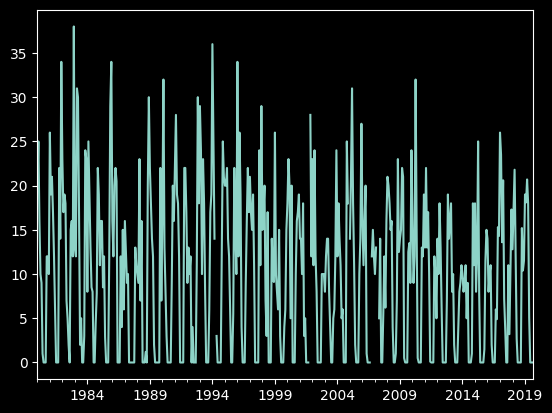

In [ ]:
(snow
 .resample('M')
 .max()
 .plot()
 )

This is now every 2 months sampled (notice how the chart is less edgy, this because increasing sample size range leads to greater uniformity).

2M samples at every 2 months

<Axes: >

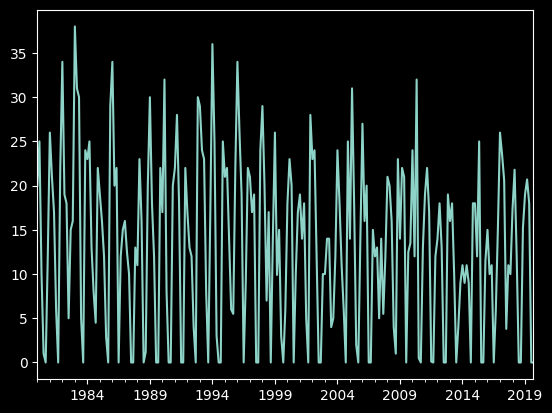

In [ ]:
(snow
 .resample('2M')
 .max()
 .plot())

We can also sample annually and determine the month we want the annual period to end each period. New years used to be celebrated every April, now it's April fools.

<Axes: >

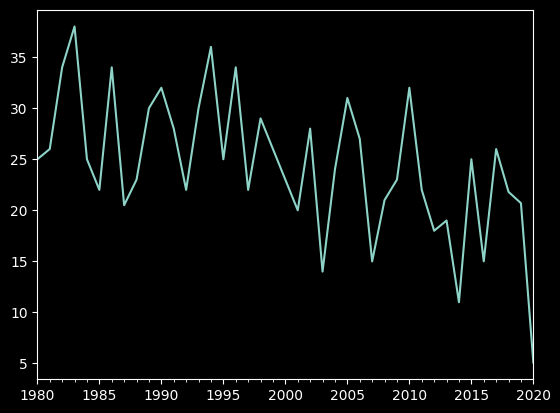

In [157]:
(snow
 .resample('A-APR')
 .max()
 .plot()
)

In [ ]:
snow.div?

This is the % of quartlery snow fall that respective day contributed to the quarterly snow fall. an individual in some cases there are quarters when a single day accounted for 100% of the snow fall (possible in non-winter months). Higher % days are in typically non snowing months.

We take snow and we divide it by the data set resampled quarterly (we then use transform so that the index remains the same, which is on a per day basis not quarterly basis. Since the original value is now divied by the value for that quarter we can see how much each individual day contributed to the quarterly snow fall.

In [158]:
(snow
 .div(snow
        .resample('Q')
        .transform(sum))
      .mul(100)
      .fillna(0)
      .sort_values(ascending=False)
      .head(20)
 )


2016-09-24 00:00:00+00:00    100.000000
2009-09-30 00:00:00+00:00    100.000000
1983-07-16 00:00:00+00:00    100.000000
2000-09-23 00:00:00+00:00    100.000000
1995-09-29 00:00:00+00:00     91.666667
2003-09-10 00:00:00+00:00     83.333333
1996-09-17 00:00:00+00:00     69.230769
1984-09-25 00:00:00+00:00     60.000000
1987-04-19 00:00:00+00:00     58.823529
2017-09-24 00:00:00+00:00     58.510638
1988-09-13 00:00:00+00:00     54.545455
1994-05-03 00:00:00+00:00     50.000000
2008-09-01 00:00:00+00:00     50.000000
1994-05-01 00:00:00+00:00     50.000000
2008-09-22 00:00:00+00:00     50.000000
2000-05-11 00:00:00+00:00     48.192771
2007-06-06 00:00:00+00:00     46.511628
1992-04-18 00:00:00+00:00     46.153846
1988-09-14 00:00:00+00:00     45.454545
2007-09-24 00:00:00+00:00     43.650794
Name: SNOW, dtype: float64

An individual day on a winter month is going to be less of a contributer to the overall snow fall than snow fall happening during less frequent snow fall, a single day could be the entire snow accumulate for a given spring or fall.

In [170]:
(snow
 .div(snow
        .resample('Q')
        .transform(sum))
      .mul(100)
      .fillna(0)
      .sort_values(ascending=False)
      .iloc[-13500:-13480]
 )


1990-12-02 00:00:00+00:00    5.559416
1990-11-28 00:00:00+00:00    5.559416
1987-12-31 00:00:00+00:00    5.555556
2008-04-16 00:00:00+00:00    5.550416
2008-05-12 00:00:00+00:00    5.550416
2003-02-03 00:00:00+00:00    5.545287
2002-12-31 00:00:00+00:00    5.499542
2002-11-11 00:00:00+00:00    5.499542
2002-10-02 00:00:00+00:00    5.499542
2002-12-29 00:00:00+00:00    5.499542
1985-10-22 00:00:00+00:00    5.489478
1996-03-23 00:00:00+00:00    5.483871
2016-12-11 00:00:00+00:00    5.483405
2010-04-02 00:00:00+00:00    5.479452
2011-11-12 00:00:00+00:00    5.479452
2011-11-01 00:00:00+00:00    5.479452
2011-10-08 00:00:00+00:00    5.479452
2010-04-04 00:00:00+00:00    5.479452
2014-12-22 00:00:00+00:00    5.462491
2004-04-09 00:00:00+00:00    5.454545
Name: SNOW, dtype: float64

First we take the 2017 season and store it in a variable. We then take that variable and sample by month so that the snow fall is aggregated by sum monthly for that period. We divide that by the sum of all snow fall in that period, and we are now able to see on a given month, how much it contributed to overall snow fall in our sample.

In [171]:
season2017 = snow.loc['2016-10':'2017-05']
(season2017
 .resample('M')
 .sum()
 .div(season2017
 .sum())
 .mul(100)
)

2016-10-31 00:00:00+00:00     2.153969
2016-11-30 00:00:00+00:00     9.772637
2016-12-31 00:00:00+00:00    15.715995
2017-01-31 00:00:00+00:00    25.468688
2017-02-28 00:00:00+00:00    21.041085
2017-03-31 00:00:00+00:00     9.274033
2017-04-30 00:00:00+00:00    14.738732
2017-05-31 00:00:00+00:00     1.834862
Freq: M, Name: SNOW, dtype: float64

In this example you can see the actual snow fall values broken out by month (in the prior example you can see their corresponding respective % contributions based on the division from the total of sample.

In [172]:
season2017 = snow.loc['2016-10':'2017-05']
(season2017.resample('M').sum())

2016-10-31 00:00:00+00:00     10.8
2016-11-30 00:00:00+00:00     49.0
2016-12-31 00:00:00+00:00     78.8
2017-01-31 00:00:00+00:00    127.7
2017-02-28 00:00:00+00:00    105.5
2017-03-31 00:00:00+00:00     46.5
2017-04-30 00:00:00+00:00     73.9
2017-05-31 00:00:00+00:00      9.2
Freq: M, Name: SNOW, dtype: float64

Amount of 10 " or > snow falls per year.

In [173]:
snow.loc[snow>10].index.year.value_counts()

1983    28
1982    27
1981    21
1986    21
1996    20
1991    19
1995    18
1997    17
2008    17
1993    16
1984    16
2009    16
1994    15
1980    15
2005    15
2001    15
2017    14
2003    13
2006    12
2012    11
2004    11
2019    11
1998    11
1985    11
1990    11
2011    10
2010    10
2000    10
2007    10
1989     9
1992     9
2018     9
2015     7
2002     7
1988     6
1987     5
2016     5
1999     4
2014     4
2013     3
dtype: int64

10 inch or > snow fall count per year.

<Axes: >

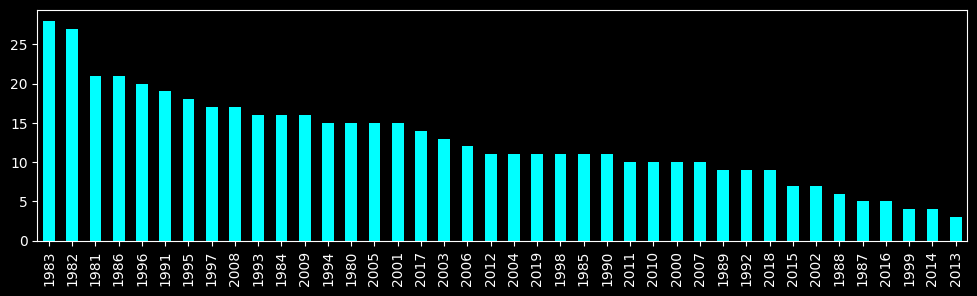

In [174]:
snow.loc[snow>10].index.year.value_counts().plot(kind='bar', figsize=(12,3), color='cyan')

Heaviest snow fall example on a single day.

In [177]:
heaviest_snow_fall = snow.loc[snow>37]

In [175]:
total_snowfall_1982 = snow.loc[snow.index.year == 1982].sum()

One day contributed to 4.47% of the snow fall that entire year.

In [178]:
heaviest_snow_fall_day_pct = heaviest_snow_fall / total_snowfall_1982 *100
heaviest_snow_fall_day_pct

1982-12-02 00:00:00+00:00    4.47322
Name: SNOW, dtype: float64

In [ ]:
snow.index

Since this is snowfall - the last two months of the year are associated with the following years ski season.

The first year in the sample does not include it's year's prior Nov / Dec. The rest of the sample does (when calculating snowfall per ski season).

We can now see the snowfall per ski season per year

In [179]:
def season(idx):
  year = idx.year
  month = idx.month
  return year.where((month < 10), year+1)

we can use groupby and our function which assigns the last 3 months of each year to the following year to group our data by ski. if our index wasnt our year we would have to rewrite our function and add a series parameter or directly reference where the data is.

In [ ]:
snow.groupby(season).sum()

Snowfall / Per Ski Season Year - 1981 was a good year to be a skiier.


<Axes: >

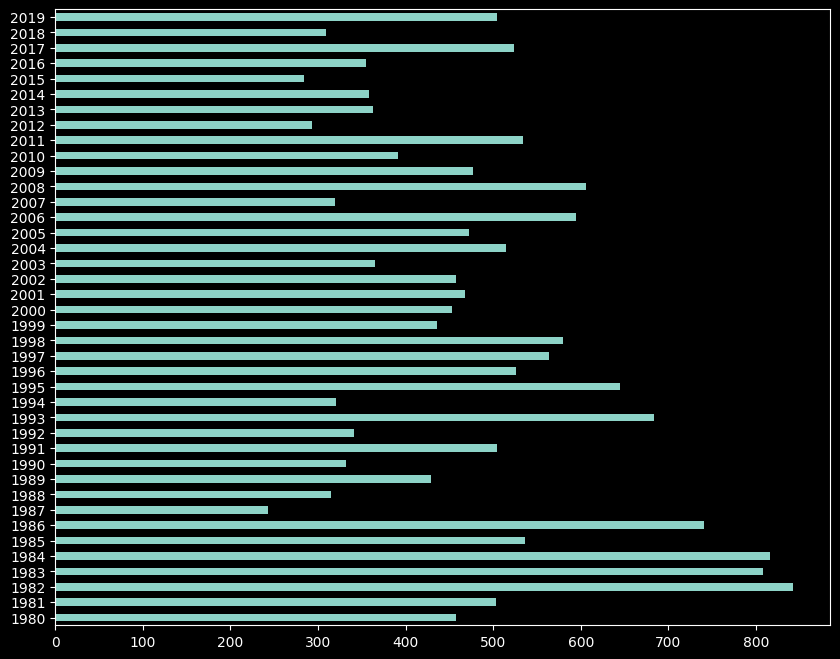

In [185]:
snow.groupby(season).sum().plot(kind='barh', figsize=(10,8))

In [186]:
(snow.
 resample('A-SEP')
 .sum()
 )

1980-09-30 00:00:00+00:00    457.5
1981-09-30 00:00:00+00:00    503.0
1982-09-30 00:00:00+00:00    842.5
1983-09-30 00:00:00+00:00    807.5
1984-09-30 00:00:00+00:00    816.0
1985-09-30 00:00:00+00:00    536.0
1986-09-30 00:00:00+00:00    740.8
1987-09-30 00:00:00+00:00    243.1
1988-09-30 00:00:00+00:00    314.5
1989-09-30 00:00:00+00:00    429.5
1990-09-30 00:00:00+00:00    331.5
1991-09-30 00:00:00+00:00    504.7
1992-09-30 00:00:00+00:00    340.8
1993-09-30 00:00:00+00:00    683.5
1994-09-30 00:00:00+00:00    321.0
1995-09-30 00:00:00+00:00    645.0
1996-09-30 00:00:00+00:00    525.5
1997-09-30 00:00:00+00:00    563.6
1998-09-30 00:00:00+00:00    579.6
1999-09-30 00:00:00+00:00    435.7
2000-09-30 00:00:00+00:00    453.0
2001-09-30 00:00:00+00:00    468.0
2002-09-30 00:00:00+00:00    457.8
2003-09-30 00:00:00+00:00    365.4
2004-09-30 00:00:00+00:00    514.0
2005-09-30 00:00:00+00:00    472.0
2006-09-30 00:00:00+00:00    594.6
2007-09-30 00:00:00+00:00    319.7
2008-09-30 00:00:00+

Can get same output with sample as our function provided (we now know how resample does this) we do get very long time series related data for our y label. This can be dealt with a variety of different ways including saving our corresponding time values as strformat and then using those for our y ticks.

<Axes: >

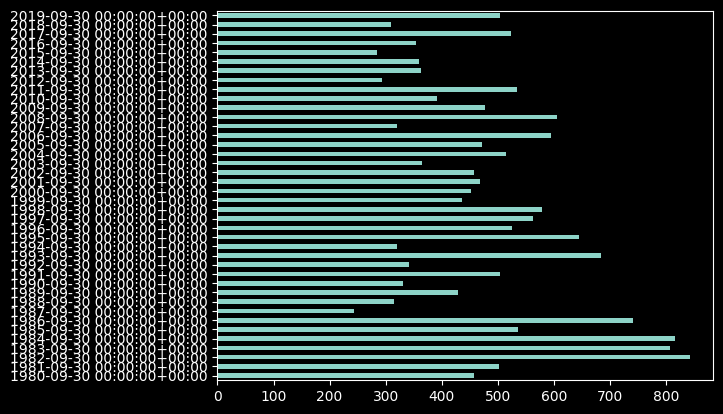

In [188]:
(snow.
 resample('A-SEP')
 .sum()
 .plot(kind='barh')
)

cumsum is the cumulative sum

Notice our snowfall for a single season chart follows a logarithmic curve. Logarithmic growth is common for many cyclical processes in nature, rainfall, plant growth, etc.)

<Axes: >

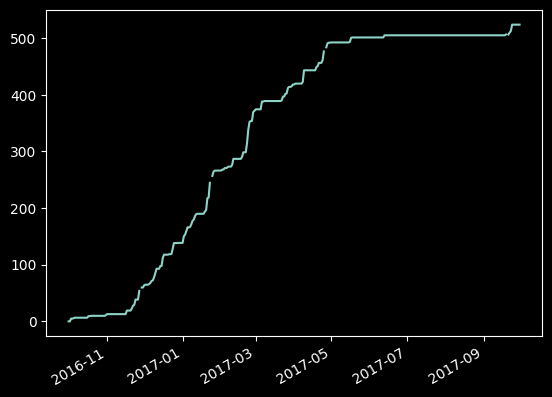

In [189]:
(snow
  .loc['2016-10':'2017-09']
 .cumsum()
 .plot()
 )

Since we are summing based on an ordered time series it has the effective of providing the cumulative sum but we cant plot the growth of the sum unless we use cumsum.

In [190]:
(snow
  .loc['2016-10':'2017-09']
  .sum()
)

524.0

In [193]:
(snow
 .resample('A-SEP')
 .transform('cumsum')
 )

1980-01-01 00:00:00+00:00      2.0
1980-01-02 00:00:00+00:00      5.0
1980-01-03 00:00:00+00:00      6.0
1980-01-04 00:00:00+00:00      6.0
1980-01-05 00:00:00+00:00      6.0
                             ...  
2019-09-03 00:00:00+00:00    504.5
2019-09-04 00:00:00+00:00    504.5
2019-09-05 00:00:00+00:00    504.5
2019-09-06 00:00:00+00:00    504.5
2019-09-07 00:00:00+00:00    504.5
Name: SNOW, Length: 14160, dtype: float64

We can see when plotting a line it follows an inverted U due to the cyclical nature of snow fall each year.

<Axes: >

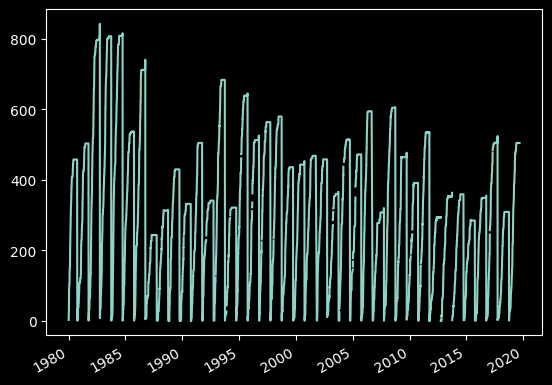

In [196]:
(snow
 .resample('A-SEP')
 .transform('cumsum')
 .plot(kind='line')
 )

Our histogram is extremely left skewed. Almost all days in the sample fall below 5 inches of snow per day as you would expect.

<Axes: ylabel='Frequency'>

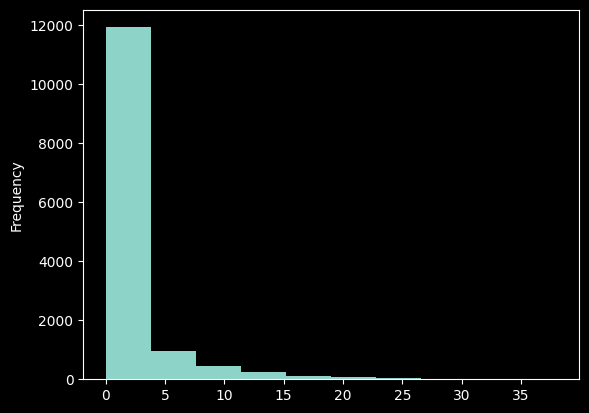

In [197]:
snow.plot.hist()

Now we are only including days where there was some snow fall.

<Axes: title={'center': 'Inches Per Snowfall FQ'}, ylabel='Frequency'>

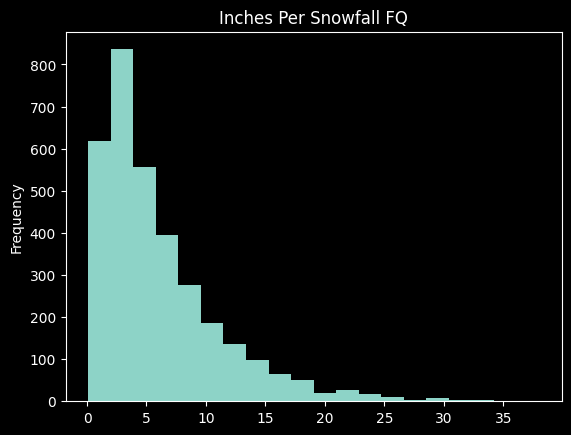

In [198]:
snow[snow>0].plot.hist(bins=20, title='Inches Per Snowfall FQ')

<Axes: title={'center': 'Snowfall over 20"'}, ylabel='Frequency'>

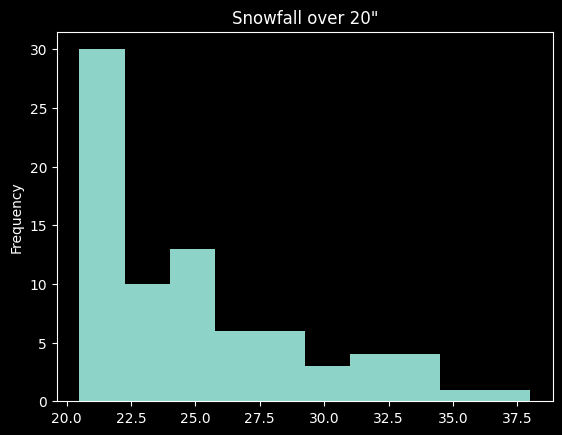

In [199]:
snow[snow>20].plot.hist(bins=10, title='Snowfall over 20"')

We are now using a lambda function to only select when the month is January and there is some snow and box plotting it.

<Axes: >

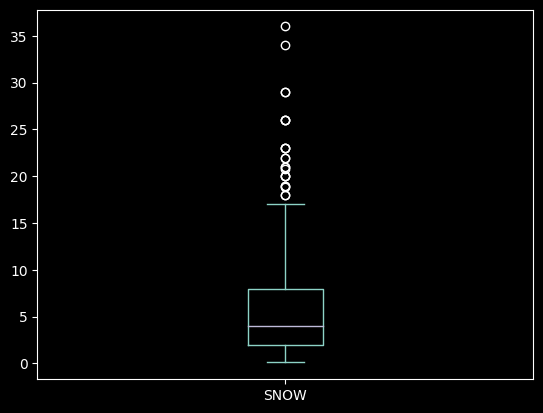

In [200]:
(snow
 [lambda s:(s.index.month == 1) & (s>0)] .plot.box()
)

This is a kernal density chart the greater the density the greater the frequency. The greatest frequeny is found for low snow fall amounts.

With KDE charts the greatest density is always just after the mean.

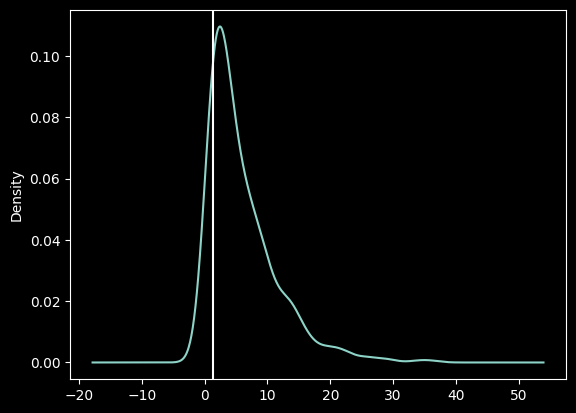

In [217]:
(snow
 [lambda s:(s.index.month == 1) & (s>0)]
 .plot(kind='kde')
 )
plt.axvline(snow.mean())
plt.show()


Charting our last 300 records.

<Axes: >

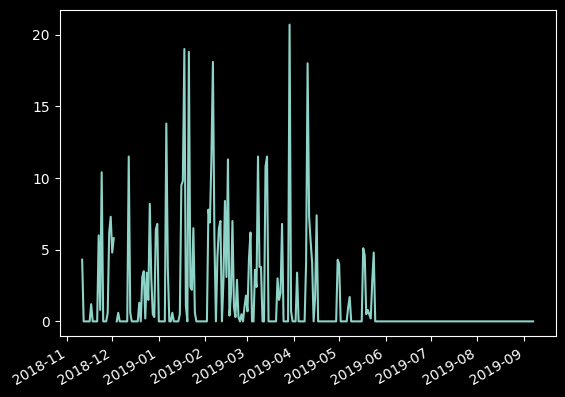

In [218]:
(snow
 .iloc[-300:]
 .plot.line()
)

In [201]:
print(season2017)

2016-10-01 00:00:00+00:00    0.0
2016-10-02 00:00:00+00:00    0.0
2016-10-03 00:00:00+00:00    4.9
2016-10-04 00:00:00+00:00    0.0
2016-10-05 00:00:00+00:00    0.6
                            ... 
2017-05-27 00:00:00+00:00    0.0
2017-05-28 00:00:00+00:00    0.0
2017-05-29 00:00:00+00:00    0.0
2017-05-30 00:00:00+00:00    0.0
2017-05-31 00:00:00+00:00    0.0
Name: SNOW, Length: 243, dtype: float64
